In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")


In [7]:
wine = pd.read_csv("data/cleansingWine.csv")
wine.head()

,Unnamed: 0,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,varieties4,varieties5,varieties6,varieties7,varieties8,varieties9,varieties10,varieties11,varieties12,type,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Carmenere,Merlot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750
1,1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Merlot,Carmenere,Cabernet Franc,Syrah & Shiraz,Petit Verdot,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750
2,2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,Cinsault,Syrah & Shiraz,Grenache Noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750
3,3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,Ugni​ blanc,Grenache Blanc,Picpoul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750
4,4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750


In [9]:

# Select relevant columns
features = ['varieties1', 'abv', 'degree', 'sweet', 'acidity', 'body', 'tannin', 'year']
target = 'price'

wine_data_clean = wine.dropna(subset=[target])

# Convert categorical features into numeric representations using LabelEncoder
label_encoders = {}
for col in features:
    if wine_data_clean[col].dtype == 'object':  # Only apply encoding to categorical columns
        le = LabelEncoder()
        wine_data_clean[col] = le.fit_transform(wine_data_clean[col].fillna('Unknown'))
        label_encoders[col] = le

wine_data_clean = wine_data_clean.dropna(subset=features)

X = wine_data_clean[features]
y = wine_data_clean[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Hidden layers (100 neurons), ReLU activation, Adam solver

model_1 = MLPRegressor(random_state=42, max_iter=1000, hidden_layer_sizes= (100,), activation= 'relu',  solver= 'adam', 
                        alpha= 0.0001, learning_rate= 'constant' )
model_1.fit(X_train_scaled, y_train)
y_pred_1 = model_1.predict(X_test_scaled)

# Evaluate performance
mae_1 = mean_absolute_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)

print(f"Set 1 - MAE: {mae_1}, R²: {r2_1}")


Set 1 - MAE: 100232.60336908931, R²: 0.07011484477653018
Set 1 - MAE: 100232.60336908931, R²: 0.07011484477653018


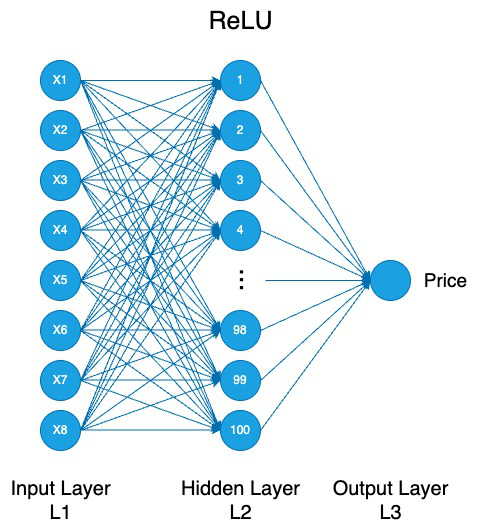

In [17]:
from PIL import Image

# Open an image file
img = Image.open('diagrams/Neural_Network_1.jpg')

img

In [11]:
# Two hidden layers (50 neurons each), Tanh activation, SGD solver

model_2 = MLPRegressor(random_state=42, max_iter=1000, hidden_layer_sizes= (50, 50), activation= 'tanh',  solver= 'sgd', 
                        alpha= 0.0001, learning_rate= 'constant' )
model_2.fit(X_train_scaled, y_train)
y_pred_2 = model_2.predict(X_test_scaled)

# Evaluate performance
mae_2 = mean_absolute_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)

print(f"Set 2 - MAE: {mae_2}, R²: {r2_2}")


Set 2 - MAE: 106897.53952941865, R²: 0.05943526973623714
Set 2 - MAE: 106897.53952941865, R²: 0.05943526973623714


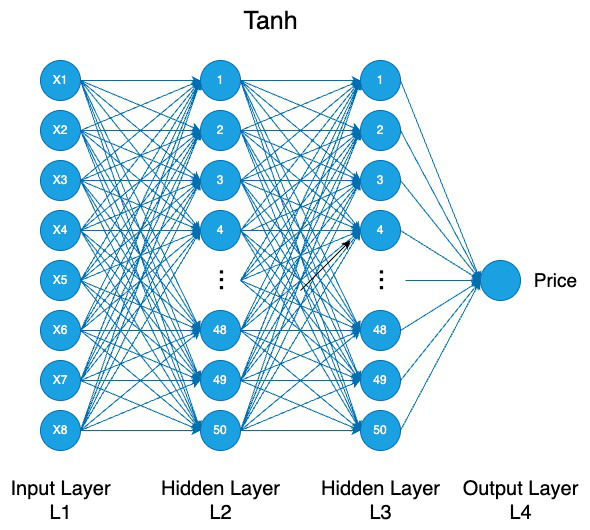

In [18]:
# Open an image file
img2 = Image.open('diagrams/Neural_Network_2.jpg')

img2

In [12]:
# Single hidden layer (200 neurons), Logistic activation, Adam solver

model_3 = MLPRegressor(random_state=42, max_iter=1000, hidden_layer_sizes= (200,), activation= 'logistic',  solver= 'adam', 
                        alpha= 0.0001, learning_rate= 'adaptive' )
model_3.fit(X_train_scaled, y_train)
y_pred_3 = model_3.predict(X_test_scaled)

# Evaluate performance
mae_3 = mean_absolute_error(y_test, y_pred_3)
r2_3 = r2_score(y_test, y_pred_3)

print(f"Set 3 - MAE: {mae_3}, R²: {r2_3}")


Set 3 - MAE: 89686.179046411, R²: -0.08257583140390667
Set 3 - MAE: 89686.179046411, R²: -0.08257583140390667


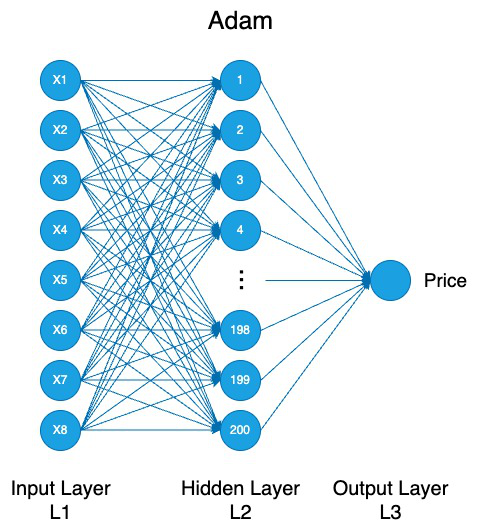

In [19]:
# Open an image file
img3 = Image.open('diagrams/Neural_Network_3.jpg')

img3

In [13]:
# Two hidden layers (100 neurons each), ReLU activation, Adam solver

model_4 = MLPRegressor(random_state=42, max_iter=1000, hidden_layer_sizes= (100, 100), activation= 'relu',  solver= 'adam', 
                        alpha= 0.0001, learning_rate= 'constant' )
model_4.fit(X_train_scaled, y_train)
y_pred_4 = model_4.predict(X_test_scaled)

# Evaluate performance
mae_4 = mean_absolute_error(y_test, y_pred_4)
r2_4 = r2_score(y_test, y_pred_4)

print(f"Set 4 - MAE: {mae_4}, R²: {r2_4}")


Set 4 - MAE: 96625.62119288911, R²: 0.11890364981797474
Set 4 - MAE: 96625.62119288911, R²: 0.11890364981797474


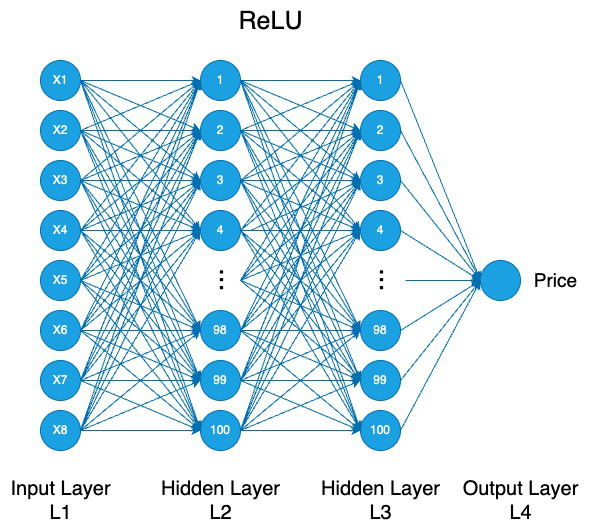

In [20]:
# Open an image file
img4 = Image.open('diagrams/Neural_Network_4.jpg')

img4

In [14]:
# Two hidden layers (150 and 50 neurons), Tanh activation, SGD solver

model_5 = MLPRegressor(random_state=42, max_iter=1000, hidden_layer_sizes= (150, 50), activation= 'tanh',  solver= 'sgd', 
                        alpha= 0.01, learning_rate= 'constant' )
model_5.fit(X_train_scaled, y_train)
y_pred_5 = model_5.predict(X_test_scaled)

# Evaluate performance
mae_5 = mean_absolute_error(y_test, y_pred_5)
r2_5 = r2_score(y_test, y_pred_5)

print(f"Set 5 - MAE: {mae_5}, R²: {r2_5}")


Set 5 - MAE: 103587.13859282705, R²: 0.05646160158650737
Set 5 - MAE: 103587.13859282705, R²: 0.05646160158650737


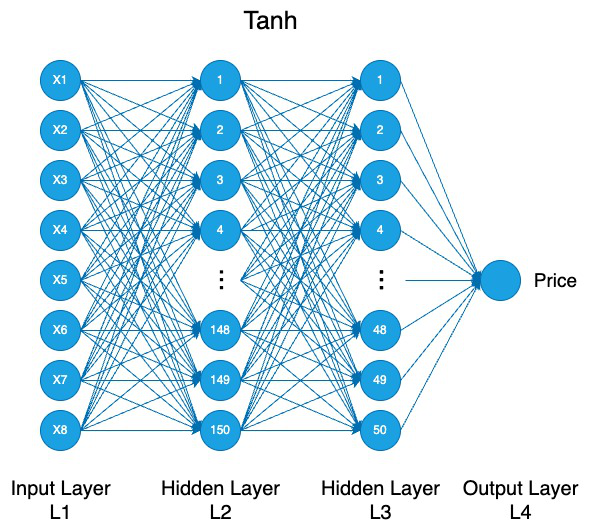

In [21]:
# Open an image file
img5 = Image.open('diagrams/Neural_Network_5.jpg')

img5